# Sprint 機械学習スクラッチ SVM

**Sprintの目的**

- スクラッチを通してSVMを理解する
- 線形モデルと異なる手法に触れる

**どのように学ぶか**

スクラッチでSVMを実装した後、学習と検証を行なっていきます。

## 【問題1】ラグランジュの未定乗数法による最急降下

SVMの学習は、ラグランジュの未定乗数法を用います。

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# 仮のデータで動きをテストしてみる

y = np.array([[1, -1, 1, -1, 1]]).reshape(-1, 1) #(5, 1)
print("y\n", y)
print("y_shape", y.shape)
print("-----------")
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]) #(5, 2)
print("X\n", X)
print("X_shape", X.shape)

y
 [[ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]]
y_shape (5, 1)
-----------
X
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
X_shape (5, 2)


In [43]:
# i,j:サンプルのインデックス
# yi:i番目のサンプルのラベル
# yj:j番目のサンプルのラベル

yi = y #(5, 1)
yj = yi.T #(1, 5)
print("yj", yj)
print("yj_shape", yj.shape)

yj [[ 1 -1  1 -1  1]]
yj_shape (1, 5)


In [44]:
np.dot(yi, yj) #(5, 5) # yi@yj,yi*yj も同じ

array([[ 1, -1,  1, -1,  1],
       [-1,  1, -1,  1, -1],
       [ 1, -1,  1, -1,  1],
       [-1,  1, -1,  1, -1],
       [ 1, -1,  1, -1,  1]])

In [45]:
# Xi:i番目のサンプルの特徴量ベクトル
# Xj:j番目のサンプルの特徴量ベクトル

Xi = X #(5, 2)
Xj = Xi.T #(2, 5)
print("Xj\n", Xj)
print("Xj_shape", Xj.shape)

Xj
 [[ 1  3  5  7  9]
 [ 2  4  6  8 10]]
Xj_shape (2, 5)


In [46]:
# 線形カーネルの式linear_kernel

def linear_kernel(Xi, Xj):
    k = np.dot(Xi, Xj)
    return k

In [47]:
kx = linear_kernel(Xi, Xj) #(5, 5)
kx

array([[  5,  11,  17,  23,  29],
       [ 11,  25,  39,  53,  67],
       [ 17,  39,  61,  83, 105],
       [ 23,  53,  83, 113, 143],
       [ 29,  67, 105, 143, 181]])

In [48]:
# λi_new:更新後のi番目のサンプルのラグランジュ乗数
# λi:更新前のi番目のサンプルのラグランジュ乗数(lamb_i)
# λj:j番目のサンプルのラグランジュ乗数(lamb_j)

lambda_i = np.array([[8, 3, 5, 9, 1]]).reshape(-1, 1) #(5, 1)
print("lambda_i\n", lambda_i)
print("lambda_i_shape", lambda_i.shape)
print("-----------")

lambda_j = lambda_i.T #(1, 5)
print("lambda_j", lambda_j)
print("lambda_j_shape", lambda_j.shape)

lambda_i
 [[8]
 [3]
 [5]
 [9]
 [1]]
lambda_i_shape (5, 1)
-----------
lambda_j [[8 3 5 9 1]]
lambda_j_shape (1, 5)


In [49]:
# ラグランジュの未定乗数法による最急降下式(勾配上昇法)

αlpha = 0.01 # 学習率
yy = np.dot(yi, yj) #(5, 5)
yykx = yy*kx
sigma = np.sum(lambda_j@yykx, axis=0)
print("sigma(before_reshape)\n", sigma)
print("-----------")
sigma = sigma.reshape(-1, 1) #ベクトルから行列に直す
print("sigma(after_reshape)\n", sigma)

lambda_i_new = lambda_i + αlpha*(1 - sigma)
print("-----------")
print("lambda_i_new: \n", lambda_i_new)

# np.where(lambda_i_new < 0, 0, lambda_i_new) #更新毎にλi>=0を満たす必要があり,満たさない場合はλi=0

sigma(before_reshape)
 [ -86  202 -318  434 -550]
-----------
sigma(after_reshape)
 [[ -86]
 [ 202]
 [-318]
 [ 434]
 [-550]]
-----------
lambda_i_new: 
 [[8.87]
 [0.99]
 [8.19]
 [4.67]
 [6.51]]


## 【問題2】サポートベクターの決定

計算したラグランジュ乗数 λ が設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。


閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。

In [50]:
# 閾値(ハイパーパラメータ) threshold

threshold = 7 # 仮に閾値を７に設定
lambda_sv_idx = np.where(lambda_i_new > threshold)[0] # 閾値より大きいサンプルの行インデックス
lambda_sv_idx
print("閾値より大きいラグランジュ乗数のインデックス", lambda_sv_idx)
lambda_sv = lambda_i_new[lambda_sv_idx]
print("閾値より大きいラグランジュ乗数:\n", lambda_sv)

閾値より大きいラグランジュ乗数のインデックス [0 2]
閾値より大きいラグランジュ乗数:
 [[8.87]
 [8.19]]


In [51]:
# # 閾値(ハイパーパラメータ) threshold

# threshold = 7 # 仮に閾値を７に設定
# lambda_sv = np.where(lambda_i_new > threshold)[0] # 閾値より大きいサンプルの行インデックス
# print("lambda_sv", lambda_sv)
# print("lambda_sv_shape", lambda_sv.shape)

## 【問題3】推定
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた f(x) の符号が分類結果です。

In [52]:
# 閾値より大きいサンプルの行インデックスのサポートベクターのラベル
y[lambda_sv_idx]

array([[1],
       [1]])

In [53]:
# X_valはtestデータ
X_val = np.array([[10, 9], [8, 7], [6, 5], [4, 3], [2, 1]]) #(5, 2)
X_val

array([[10,  9],
       [ 8,  7],
       [ 6,  5],
       [ 4,  3],
       [ 2,  1]])

In [54]:
# X_snは閾値より大きいサンプル(サポートベクターの特徴量)
X_sn = X[lambda_sv_idx] #(3, 2)
X_sn

array([[1, 2],
       [5, 6]])

In [55]:
np.dot(X_sn, X_val.T)

array([[ 28,  22,  16,  10,   4],
       [104,  82,  60,  38,  16]])

In [56]:
np.dot(X_val, X_sn.T)

array([[ 28, 104],
       [ 22,  82],
       [ 16,  60],
       [ 10,  38],
       [  4,  16]])

In [57]:
# shapeの関係上, X_valを転置したうえ引数の位置も調整
k_xsn = linear_kernel(X_sn, X_val.T) #(3, 5)
k_xsn

array([[ 28,  22,  16,  10,   4],
       [104,  82,  60,  38,  16]])

In [58]:
lambda_sv*y[lambda_sv_idx] #(3, 1)

array([[8.87],
       [8.19]])

In [59]:
y_lambda_sv = lambda_sv*y[lambda_sv_idx] #(3, 1)
y_lambda_sv.T #(1, 3)

array([[8.87, 8.19]])

In [60]:
# 推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算する式
np.dot(y_lambda_sv.T, k_xsn)

array([[1100.12,  866.72,  633.32,  399.92,  166.52]])

In [61]:
# 求めた f(x) の符号が分類結果
fx = np.where(np.dot(y_lambda_sv.T, k_xsn) <= 0, -1 , 1)
fx

array([[1, 1, 1, 1, 1]])

**ここからサポートベクターマシン（SVM)のクラスをスクラッチで作成し、学習と検証を行っていく。**

In [87]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter=500, lr=0.001, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        
        self.nsv_idx = np.array([]) # サポートベクターのインデックス
        self.X_sv = np.array([]) 
        self.lam_sv = np.array([])
        self.y_sv = np.array([])       
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # 初回ラグランジュ乗数は乱数で作成 (n_samples, 1)
        lam = np.random.rand(X.shape[0]).reshape(-1, 1)  
        
        y = y.reshape(-1, 1) # (n_samples, 1)
       
        for _ in range(self.iter): 
        
            yy = np.dot(y, y.T) #(n_samples, n_samples)
            kx = self._linear_kernel(X, X) #(n_samples, n_samples)
            yykx = yy*kx
            sigma = np.sum(lam.T@yykx, axis=0)
            sigma = sigma.reshape(-1, 1) #ベクトルから行列に直す
            lam = lam + self.lr*(1 - sigma)

             #更新毎にlam>=0を満たす必要があり,満たさない場合はlam=0
            lam = np.where(lam < 0, 0, lam) #(n_samples, 1)
        
                
        #閾値より大きいサンプルの行インデックスをインスタンス変数として保持
        self.nsv_idx = np.where(lam > self.threshold)[0]
        print("サポートベクターのインデックス", self.nsv_idx)

        #閾値より大きいラグランジュ乗数
        self.lam_sv = lam[self.nsv_idx] 
        print("閾値より大きいラグランジュ乗数\n", self.lam_sv)
        print("サポートベクトルの個数: ", len(self.lam_sv))

        self.X_sv = X[self.nsv_idx] #(samples, 2)
        self.y_sv = y[self.nsv_idx] #(samples, 2)      

        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("lambda :\n{}".format(self.lam))
            

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        tmp = np.sum(self.lam_sv)
        k = self._linear_kernel(X, self.X_sv)
        self.y_sv = self.y_sv.reshape(-1) # 下の計算のためベクトルへ変換        
        fx = tmp*self.y_sv@k
        
        return np.where(fx <= 0, -1 , 1)
    
    
    def _linear_kernel(self, Xi, Xj):
        """
        線形カーネルの計算関数

        Parameters
        ----------    
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          ロジスティック回帰の仮定関数による推定結果

        """     
        k = Xj@Xi.T 
        return k

In [88]:
# 機械学習スクラッチ入門のSprintで用意したシンプルデータセット1作成

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]
display(X.shape)
display(y.shape)

(500, 2)

(500,)

In [89]:
# 訓練データ75%、検証データ25%用に分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(375, 2)

(125, 2)

(375,)

(125,)

In [90]:
# 前処理・標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # インスタンス作成
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train) #X_trainの標準化
X_test_scaler = scaler.transform(X_test) #X_testの標準化
# print(X_train_scaler)
# print(X_test_scaler)

In [91]:
# スクラッチ実装の学習と推定を行ってみる

reg_scratch = ScratchSVMClassifier()
reg_scratch.fit(X_train_scaler, y_train, X_test_scaler, y_test)
y_pred_scratch = reg_scratch.predict(X_test_scaler)

サポートベクターのインデックス [  0   8  43  53  91 126 148 158 187 216 220 237 239 284 338]
閾値より大きいラグランジュ乗数
 [[2.22307101e-02]
 [3.57324170e-01]
 [4.76078290e-01]
 [8.92110398e-03]
 [5.02642681e-03]
 [3.53742546e-01]
 [3.49950910e-01]
 [6.36432495e-02]
 [2.66682585e-03]
 [2.22174490e-04]
 [7.97887516e-02]
 [6.06525422e-02]
 [4.33170858e-01]
 [3.06337165e-02]
 [1.06537542e-01]]
サポートベクトルの個数:  15


In [93]:
# AccuracyやPrecision、Recallなどの指標値を出してみる

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [94]:
scratch_accuracy_score = accuracy_score(y_test, y_pred_scratch) # 正解率
scratch_precision_score = precision_score(y_test, y_pred_scratch) #適合率
scratch_recall_score = recall_score(y_test, y_pred_scratch) #再現率
scratch_f1_score = f1_score(y_test, y_pred_scratch) #F値
scratch_confusion_matrix = confusion_matrix(y_test, y_pred_scratch) #混同行列

print('スクラッチ実装')
print('正解率: {}'.format(scratch_accuracy_score))
print('適合率: {}'.format(scratch_precision_score))
print('再現率: {}'.format(scratch_recall_score))
print('F値: {}'.format(scratch_recall_score))
print('混同行列: \n{}'.format(scratch_confusion_matrix))

スクラッチ実装
正解率: 1.0
適合率: 1.0
再現率: 1.0
F値: 1.0
混同行列: 
[[51  0]
 [ 0 74]]


**scikit-learnによる実装と比べ、正しく動いているかを確認**

In [95]:
from sklearn.svm import SVC

lr_sklearn = SVC() # インスタンス作成
lr_sklearn.fit(X_train_scaler, y_train) # 学習
y_pred_sklearn = lr_sklearn.predict(X_test_scaler) # 予測

sklearn_accuracy_score = accuracy_score(y_test, y_pred_sklearn) # 正解率
sklearn_precision_score = precision_score(y_test, y_pred_sklearn) #適合率
sklearn_recall_score = recall_score(y_test, y_pred_sklearn) #再現率
sklearn_f1_score = f1_score(y_test, y_pred_sklearn) #F値
sklearn_confusion_matrix = confusion_matrix(y_test, y_pred_sklearn) #混同行列

print('scikit-learnによる実装')
print('正解率: {}'.format(sklearn_accuracy_score))
print('適合率: {}'.format(sklearn_precision_score))
print('再現率: {}'.format(sklearn_recall_score))
print('F値: {}'.format(sklearn_recall_score))
print('混同行列: \n{}'.format(sklearn_confusion_matrix))

scikit-learnによる実装
正解率: 1.0
適合率: 1.0
再現率: 1.0
F値: 1.0
混同行列: 
[[51  0]
 [ 0 74]]


**考察：スクラッチはscikit-learnによる実装と同じ結果となったため、正しく動いていると言えよう。**

## 【問題5】決定領域の可視化
決定領域を可視化してください。

In [77]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(
    X, y, model, step=0.01, 
    title='decision region', xlabel='xlabel', ylabel='ylabel', 
    target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)　
        特徴量
    y : ndarray, shape(n_samples,)　　
        ラベル
    model : object　　　　　　　　　　
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)　　　　  
        推定値を計算する間隔を設定する
    title : str　                                    
        グラフのタイトルの文章を与える
    xlabel, ylabel : str　                       
        軸ラベルの文章を与える
    target_names= : list of str　          
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    
    # サポートベクトル表示
    plt.scatter(reg_scratch.X_sv[:, 0], reg_scratch.X_sv[:, 1], s=80, color="y", label="sv", marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

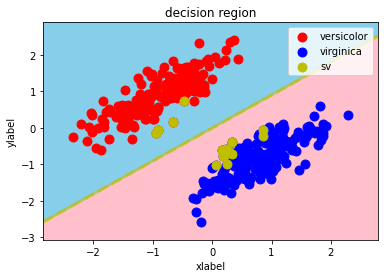

In [78]:
# スクラッチ実装(訓練データ)

decision_region(X_train_scaler, y_train, model=reg_scratch)

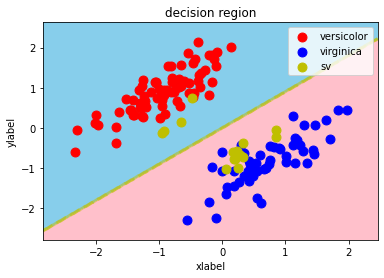

In [79]:
# スクラッチ実装(検証データ)

decision_region(X_test_scaler, y_test, model=reg_scratch)

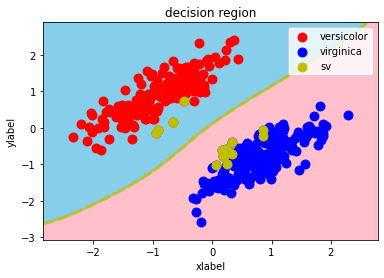

In [80]:
# scikit-learnによる実装(訓練データ)

decision_region(X_train_scaler, y_train, model=lr_sklearn)

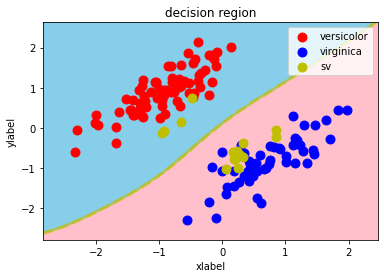

In [81]:
# scikit-learnによる実装(検証データ)

decision_region(X_test_scaler, y_test, model=lr_sklearn)